<a href="https://www.kaggle.com/code/pierreoliviertits/leukaemia-classification-extreme-learning-machine?scriptVersionId=91772268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as img

In [2]:
# Parameters
rim = 200 #resizing the image
val = 0.1 #10% of the training set data for the validation set
hu = 750 #hidden units
rel = 1

In [3]:
# Importing images from the training set (and the test set)

def import_data(path):
    spl = []
    for filename in glob.glob(path):
        im = Image.open(filename,'r')
        im = im.resize((rim,rim))#resizing the image
        im = np.array(im)
        IM = im.ravel() #contiguous flattened array (1D)
        spl.append(IM)
    return spl

# Path of the cancer cell images (Acute Lymphoblastic Leukemia) from the training set - all
path1 = '//kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/*.bmp'
path2 = '//kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/*.bmp'
path3 = '//kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all/*.bmp'

#import of cancer cells
a1 = import_data(path1) 
print("a1: size  = ", len(a1))
a2 = import_data(path2)
print("a2: size  = ", len(a2))
a3 = import_data(path3)
print("a3: size  = ", len(a3))

train_a = []

for i in a1:
    train_a.append(i)#adding a cancer cell image to the relevant list
for i in a2:
    train_a.append(i)
for i in a3:
    train_a.append(i)

# Path of non-cancerous cell images from the training set - hem
path4 = '//kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/hem/*.bmp'
path5 = '//kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/*.bmp'
path6 = '//kaggle/input/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/hem/*.bmp'

#import of non-cancerous cells
h1 = import_data(path4)
print("h1: size  = ", len(h1))
h2 = import_data(path5)
print("h2: size  = ", len(h2))
h3 = import_data(path6)
print("h3: size  = ", len(h3))

train_h = []

for i in h1:
    train_h.append(i) #adding a non-cancerous cell image to the relevant list
for i in h2:
    train_h.append(i)
for i in h3:
    train_h.append(i)

#testing_data
path7 = '../input/leukemia-classification/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/*.bmp'


#import of test set images
t = import_data(path7)
print("t: size  = ", len(t))

test_t = []

for i in t:
    test_t.append(i) #add a test set cell image to the relevant list


a1: size  =  2397
a2: size  =  2418
a3: size  =  2457
h1: size  =  1130
h2: size  =  1163
h3: size  =  1096
t: size  =  2586


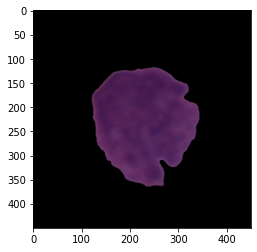

In [4]:
#example of an image from the training set representing a cancerous image (Acute Lymphoblastic Leukemia)
image = img.imread('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp')
plt.imshow(image)
plt.show()


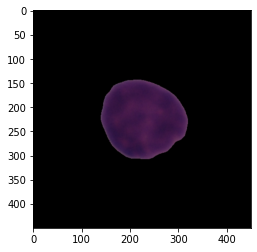

In [5]:
#example of a training set image representing a non-cancerous image
image = img.imread('../input/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/hem/UID_H11_10_1_hem.bmp')
plt.imshow(image)
plt.show()

In [6]:
dataframe_train_a = pd.DataFrame({'image':train_a, 'label': 'hem'}) #images of non-cancerous cells are assigned the label hem
dataframe_train_h = pd.DataFrame({'image':train_h, 'label': 'all'}) #images of cancer cells are labelled all (Acute Lymphoblastic Leukemia)

In [7]:
data_train = dataframe_train_a.append(dataframe_train_h,ignore_index=True) #the hem data is merged with the all data

In [8]:
trainX = []
for tdim in data_train.image:
    trainX.append(tdim) #we assign the image to trainX
trainY = np.array(data_train.label) #assign the label to trainY

In [9]:
traindY = []
for i in range(len(trainY)):
    if(trainY[i]=="hem"):
        traindY.append(0) #hem is given the value 0
    else:
        traindY.append(1) #we give the value 1 to all
print(len(traindY))

10661


In [10]:
traindX = np.array(trainX)

In [11]:
classes = 2
trainY = np.zeros([len(traindY), classes])
for i in range(len(traindY)):
        trainY[i][traindY[i]] = 1

In [12]:
# Division of the training set into validation (10%) and training set (90%)
from sklearn.model_selection import train_test_split

trainX, validX, trainY, validY = train_test_split(traindX, trainY, test_size=val)
print('Training size: {training}, Validation size: {validation}'.format(training=len(trainX), validation=len(validX)))

Training size: 9594, Validation size: 1067


In [13]:
# Matrix transformation
trainX=np.matrix(trainX)
trainY=np.matrix(trainY)

validX=np.matrix(validX)
validY=np.matrix(validY)

test_t=np.matrix(test_t)

In [14]:
# Extreme Learning Machine model
inputL = trainX.shape[1] #input length
HiddenUnits = hu #Hidden units
Wi = np.random.normal(size=[inputL, HiddenUnits]) #Gaussian random noise
Wi = np.matrix(Wi) #Hidden layer input weight matrix

print('Input weight shape: {shape}'.format(shape=Wi.shape))

Input weight shape: (120000, 750)


In [15]:
def input_hidden(x):
    print("x shape:",x.shape)
    print("Weights shape:",Wi.shape)
    
    m = np.dot(x, Wi) #matrix product (x.Wi)
    m = np.maximum(m, rel, m) 
    return m

In [16]:
X = input_hidden(trainX) 
X_t = np.transpose(X)

x shape: (9594, 120000)
Weights shape: (120000, 750)


In [17]:
www_1 = np.dot(X_t, X) 
c = np.identity(len(np.array(www_1)))
c = np.dot(c,3)
www_1 = www_1 + c
ww_1 = np.linalg.inv(www_1) 

ww_2 = np.dot(X_t, trainY) 

Wo = np.dot(ww_1, ww_2) #Final formula to be multiplied by x to get the prediction
print('Output weights shape: {shape}'.format(shape=Wo.shape))

Output weights shape: (750, 2)


In [18]:
def predict(x):
    x = input_hidden(x)
    y = np.dot(x, Wo) #(x*Wo)
    return y

In [19]:
# Prediction
accuracy_ =  []
specificty_ = []
sensibility = []

TP = 0 #all = positif
TN = 0 #hem = negatif
FP = 0 
FN = 0

y = predict(validX)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(validY[i])
    correct = correct + (1 if predicted == test else 0)
    TP = TP + (1 if predicted == test == 1 else 0)
    TN = TN + (1 if predicted == test == 0 else 0)
    FP = FP + (1 if predicted==1 and test == 0 else 0)
    FN = FN + (1 if predicted==0 and test == 1 else 0)

MAT_CONF = [(TP, FP), (FN, TN)]
print('TP ' ,TP, '  ', 'FP ',FP)
print('FN ',FN, '  ', 'TN ',TN)
print('ACCURACY : ',(TP+TN)/(TP+TN+FP+FN))
accuracy_.append((TP+TN)/(TP+TN+FP+FN)) 
print('SENSIVITY : ', (TP)/(TP+FN))
sensibility.append((TP)/(TP+FN))
print('SPECIFICITY : ', (TN)/(TN+FP))
specificty_.append((TN)/(TN+FP))

x shape: (1067, 120000)
Weights shape: (120000, 750)
TP  198    FP  68
FN  121    TN  680
ACCURACY :  0.8228678537956888
SENSIVITY :  0.6206896551724138
SPECIFICITY :  0.9090909090909091


In [20]:
#testing_data prediction 
y=predict(test_t)
for i in range(total):
    predicted = np.argmax(y[i])
    if(predicted==1):
        predicted = "all"
    else:
        predicted = "hem"
    
    print(predicted)

x shape: (2586, 120000)
Weights shape: (120000, 750)
hem
all
all
all
all
all
hem
hem
all
all
hem
all
all
all
all
all
all
all
all
all
hem
all
all
all
hem
all
all
all
hem
all
all
hem
hem
hem
all
all
all
all
all
all
all
all
hem
all
all
all
hem
all
all
all
all
hem
all
all
all
all
all
all
hem
all
all
all
all
all
all
hem
all
all
all
all
all
all
all
all
all
all
hem
all
all
hem
all
all
all
all
hem
all
all
all
all
all
hem
all
all
all
all
all
hem
all
hem
all
all
hem
hem
all
all
all
all
all
all
all
all
all
all
all
all
hem
all
all
all
hem
all
all
all
all
all
all
all
hem
all
all
all
all
all
hem
all
all
hem
all
all
all
all
all
hem
all
all
all
hem
all
all
all
all
all
hem
hem
all
all
all
all
all
all
all
all
all
all
hem
all
all
hem
all
all
all
all
all
all
all
all
all
all
all
all
all
hem
all
all
all
all
all
hem
all
all
hem
hem
all
all
all
all
hem
hem
all
hem
hem
all
all
all
hem
all
all
all
hem
all
hem
all
all
all
all
all
all
hem
all
all
hem
all
all
hem
all
hem
hem
all
hem
all
all
all
hem
all
all
hem
all